In [1]:
import polars as pl

In [2]:
weeks = []
for week in range(1,10):
    df = pl.read_csv(f"/Users/zekeweng/Dropbox/BigDataBowl/presnap/week_{week}.csv", null_values=["NA"])
    weeks.append(df)

presnap = pl.concat(weeks)

In [3]:
defense = presnap.filter(pl.col("club") != pl.col("possessionTeam"))
offense = presnap.filter(pl.col("club") != pl.col("defensiveTeam"))

### Types of Pass Coverage

In [4]:
coverage_counts = (
    presnap
    .group_by(["gameId", "playId"])
    .agg(pl.col("pff_passCoverage").first().alias("passCoverage"))
    .group_by("passCoverage")
    .agg(pl.len().alias("count"))
    .sort("passCoverage")
)

print(coverage_counts)

shape: (16, 2)
┌───────────────┬───────┐
│ passCoverage  ┆ count │
│ ---           ┆ ---   │
│ str           ┆ u32   │
╞═══════════════╪═══════╡
│ null          ┆ 329   │
│ 2-Man         ┆ 185   │
│ Cover 6-Left  ┆ 691   │
│ Cover-0       ┆ 601   │
│ Cover-1       ┆ 3291  │
│ …             ┆ …     │
│ Cover-3 Seam  ┆ 634   │
│ Cover-6 Right ┆ 688   │
│ Goal Line     ┆ 144   │
│ Quarters      ┆ 2063  │
│ Red Zone      ┆ 534   │
└───────────────┴───────┘


### Types of Offensive Plays

In [5]:
offensive_plays = (
    presnap
    .group_by(["gameId", "playId"])
    .agg(pl.col("offensivePlay").first().alias("offensivePlay"))
    .group_by("offensivePlay")
    .agg(pl.len().alias("count"))
    .sort("offensivePlay")
)

print(offensive_plays)

shape: (9, 2)
┌────────────────────┬───────┐
│ offensivePlay      ┆ count │
│ ---                ┆ ---   │
│ str                ┆ u32   │
╞════════════════════╪═══════╡
│ null               ┆ 329   │
│ PASS_MIDDLE        ┆ 7421  │
│ PASS_OUTSIDE_LEFT  ┆ 466   │
│ PASS_OUTSIDE_RIGHT ┆ 784   │
│ RPO                ┆ 1628  │
│ RUN_INSIDE_LEFT    ┆ 1558  │
│ RUN_INSIDE_RIGHT   ┆ 1574  │
│ RUN_OUTSIDE_LEFT   ┆ 1069  │
│ RUN_OUTSIDE_RIGHT  ┆ 1238  │
└────────────────────┴───────┘


### Number of Presnap Frames (per play)

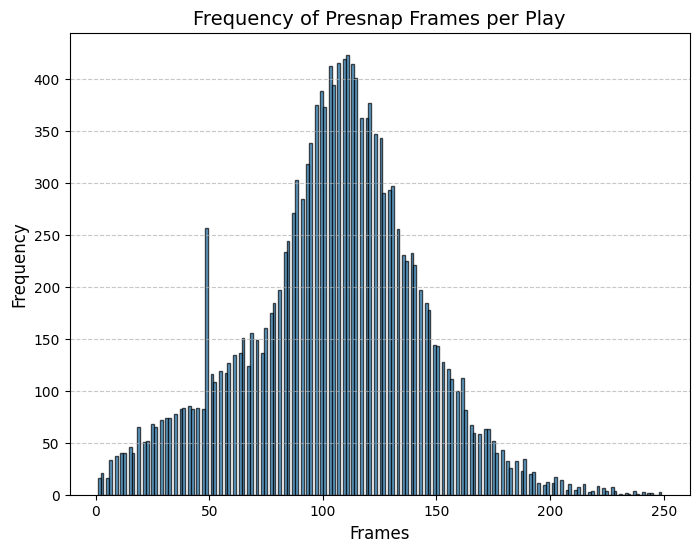

In [6]:
import polars as pl
import matplotlib.pyplot as plt

result = (
    presnap
    .group_by(["gameId", "playId"])
    .agg(pl.col("frameId").max().alias("max_frameId"))
    .sort(["gameId", "playId"])
)

max_frame_ids = result["max_frameId"].to_pandas()

plt.figure(figsize=(8, 6))
plt.hist(max_frame_ids, bins=200, edgecolor="black", alpha=0.7)
plt.xlabel("Frames", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Frequency of Presnap Frames per Play", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Average Number of Positions on the field (per play)

In [12]:
offensive_positions = (
    offense
    .group_by(["gameId", "playId"])
    .agg(pl.col(["QB", "RB", "FB", "WR", "TE", "OL"]).first())
    .select(
        [
            pl.col("QB").mean().alias("QB_avg"),
            pl.col("RB").mean().alias("RB_avg"),
            pl.col("FB").mean().alias("FB_avg"),
            pl.col("WR").mean().alias("WR_avg"),
            pl.col("TE").mean().alias("TE_avg"),
            pl.col("OL").mean().alias("OL_avg"),
        ]
    )
)
offensive_positions

QB_avg,RB_avg,FB_avg,WR_avg,TE_avg,OL_avg
f64,f64,f64,f64,f64,f64
1.005464,1.020714,0.100648,2.550133,1.294129,5.028593


In [16]:
defensive_positions = (
    defense
    .group_by(["gameId", "playId"])
    .agg(pl.col(["DE", "DT", "LB", "CB", "S"]).first())
    .select(
        [
            pl.col("DE").mean().alias("DE_avg"),
            pl.col("DT").mean().alias("DT_avg"),
            pl.col("LB").mean().alias("LB_avg"),
            pl.col("CB").mean().alias("CB_avg"),
            pl.col("S").mean().alias("S_avg")
        ]
    )
)
defensive_positions

DE_avg,DT_avg,LB_avg,CB_avg,S_avg
f64,f64,f64,f64,f64
1.423942,1.687508,3.053374,2.627272,2.208222
